## This dataset contains information about Airbnb listings, including host details, price, availability, number of reviews, and location (latitude and longitude).


In [45]:
import pandas as pd

# 1. Clean and Manipulate the data for better use in the analysis



 ## 1.1 Import data using pandas

In [46]:
data = pd.read_csv("https://github.com/aswinvk28/collection-of-kaggle-datasets/raw/refs/heads/main/datasets/real_estate/airbnb_open_data/Airbnb_Open_Data.csv", low_memory=False)

In [47]:
# Set pandas to show all columns
pd.set_option('display.max_columns', None)

In [48]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## 1.2 Check data types and column names for any necessary changes

In [49]:
data.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [50]:
# Replace some column names with more convenient names
data.rename(columns={'NAME' : 'name', 'Construction year' : 'construction year'}, inplace=True)

In [51]:
# To make the prices and service fees numerical values, we have to clean it
# from spaces, delete the dollar symbol and delete any blank spaces
data['price'] = data['price'].str.strip().str.replace('$', '').str.replace(',', "").astype(float)
data['service fee'] = data['service fee'].str.strip().str.replace("$","").str.replace(",", "").astype(float)

In [52]:
data['construction year'] = pd.to_datetime(data['construction year'], format='%Y')

In [53]:
data['construction year'] = data['construction year'].dt.year

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [55]:
data['last review'] = pd.to_datetime(data['last review']).dt.strftime('%d/%m/%Y')

## 1.3 Drop unnecessary columns

In [56]:
data.drop(['host_identity_verified', 'house_rules', 'license', 'last review',
           'calculated host listings count'], axis=1, inplace=True)

In [57]:
data.head()

,id,name,host id,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,5.0,352.0
3,1002755,NaN,85098326012,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,289.0


## 1.4 Find and manage null values. Fill the cells with values that do not interrupt the results of the analysis and drop the raws that can't be filled.

In [58]:
data.isnull().sum()

,0
id,0
name,250
host id,0
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532
country code,131


In [59]:
for column in ['name', 'host name', 'neighbourhood group', 'neighbourhood',
               'instant_bookable', 'cancellation_policy']:
  data.fillna({column : 'Unknown'}, inplace=True)

In [60]:
data.fillna({'country' : 'United States'}, inplace=True)

In [61]:
data.fillna({'country code': 'US'}, inplace=True)

In [62]:
data.fillna({'construction year' : round(data['construction year'].mean())}, inplace=True)

In [63]:
data.fillna({'minimum nights' : 1}, inplace=True)

In [64]:
data.fillna({'number of reviews' : data['number of reviews'].median()}, inplace=True)

In [65]:
data.fillna({'reviews per month' : data['reviews per month'].median()}, inplace=True)

In [66]:
data.fillna({'availability 365' : round(data['availability 365'].mean())}, inplace=True)

In [67]:
data.fillna({'review rate number' : data['review rate number'].median()})

,id,name,host id,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,0.74,5.0,352.0
3,1002755,Unknown,85098326012,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,844.0,169.0,1.0,0.0,0.74,3.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,837.0,167.0,1.0,1.0,0.02,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,988.0,198.0,3.0,0.0,0.74,5.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,546.0,109.0,2.0,5.0,0.10,3.0,386.0


In [68]:
data.dropna(inplace=True)

In [69]:
data.isnull().sum()

,0
id,0
name,0
host id,0
host name,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0
country code,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101779 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   101779 non-null  int64  
 1   name                 101779 non-null  object 
 2   host id              101779 non-null  int64  
 3   host name            101779 non-null  object 
 4   neighbourhood group  101779 non-null  object 
 5   neighbourhood        101779 non-null  object 
 6   lat                  101779 non-null  float64
 7   long                 101779 non-null  float64
 8   country              101779 non-null  object 
 9   country code         101779 non-null  object 
 10  instant_bookable     101779 non-null  object 
 11  cancellation_policy  101779 non-null  object 
 12  room type            101779 non-null  object 
 13  construction year    101779 non-null  float64
 14  price                101779 non-null  float64
 15  service fee          1

## 2. Now that the data are clean we can move to the analysis part

## 2.1 What are the most expensive and cheapest neighborhoods for Airbnb rentals?


In [71]:
most_expensive_neighbourhoods = data.groupby('neighbourhood').agg({'price': 'mean'}
                  ).sort_values('price', ascending=False).head(5).reset_index()
most_expensive_neighbourhoods = most_expensive_neighbourhoods.apply(lambda x : round(x, 0))
display(most_expensive_neighbourhoods)

,neighbourhood,price
0,New Dorp,1045.0
1,"Chelsea, Staten Island",1042.0
2,Fort Wadsworth,1024.0
3,Little Neck,818.0
4,Jamaica Hills,813.0


In [72]:
cheapest_neighbourhoods = data.groupby('neighbourhood').agg({'price' : 'mean'}
      ).sort_values('price').head(5).reset_index()
cheapest_neighbourhoods = cheapest_neighbourhoods.apply(lambda x : round(x))
display(cheapest_neighbourhoods)

,neighbourhood,price
0,Lighthouse Hill,108.0
1,Spuyten Duyvil,293.0
2,Rossville,301.0
3,Breezy Point,310.0
4,Richmondtown,373.0


In [73]:
import matplotlib.pyplot as plt

(0.0, 1200.0)

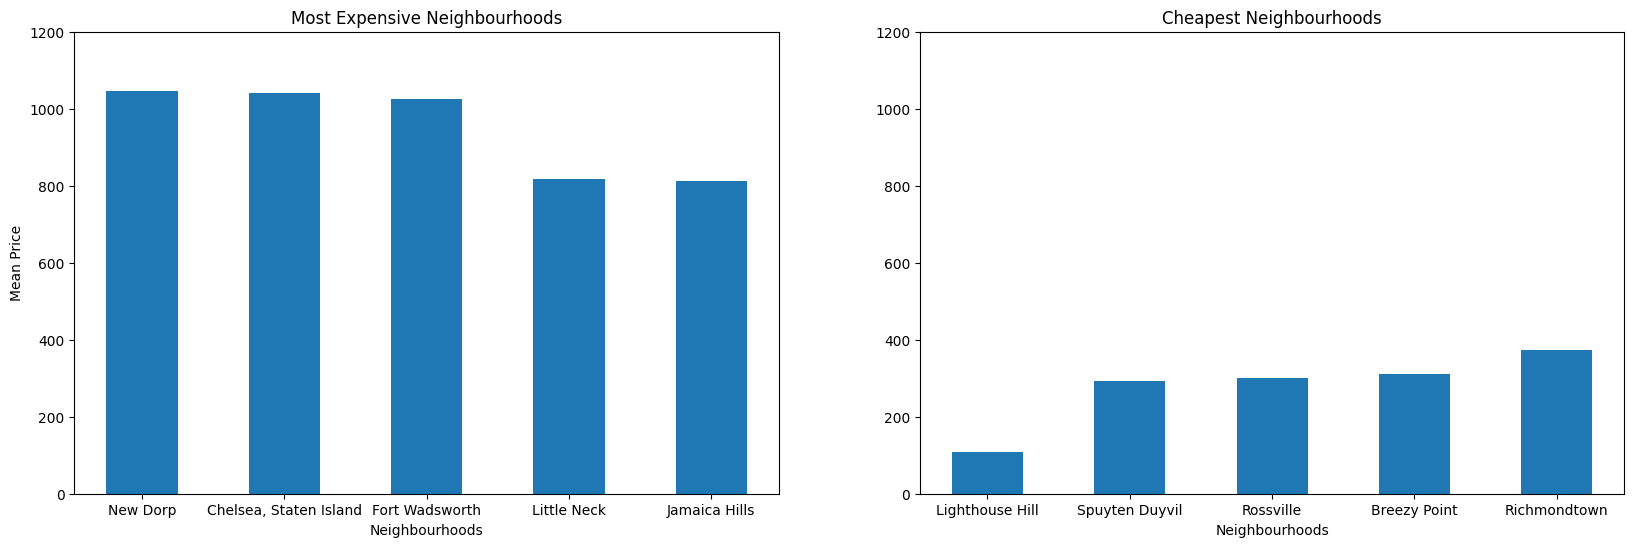

In [74]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.bar(most_expensive_neighbourhoods['neighbourhood'],
        most_expensive_neighbourhoods['price'],
        width=0.5)
plt.ylim(0, 1200)
plt.xlabel('Neighbourhoods')
plt.ylabel('Mean Price')
plt.title('Most Expensive Neighbourhoods')
plt.subplot(1, 2, 2)
plt.bar(cheapest_neighbourhoods['neighbourhood'],
        cheapest_neighbourhoods['price'],
        width=0.5)
plt.title('Cheapest Neighbourhoods')
plt.xlabel('Neighbourhoods')
plt.ylim(0, 1200)

## 2.2 How does price vary by room type?

In [75]:
price_by_room = data.groupby('room type')['price'].mean().reset_index()
price_by_room = price_by_room.apply(lambda x : round(x))
display(price_by_room)

,room type,price
0,Entire home/apt,625.0
1,Hotel room,664.0
2,Private room,625.0
3,Shared room,634.0


Text(0, 0.5, 'Room Type')

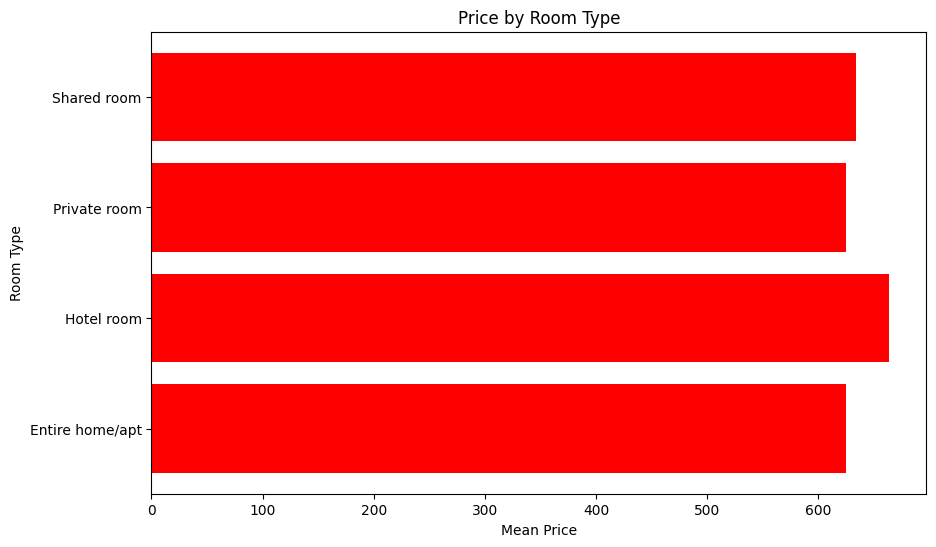

In [76]:
plt.figure(figsize=(10, 6))
plt.barh(price_by_room['room type'], price_by_room['price'], color='r')
plt.title('Price by Room Type')
plt.xlabel('Mean Price')
plt.ylabel('Room Type')

## 2.3 Is there a relationship between price and customer reviews?

In [77]:
price_and_reviews = data.groupby('review rate number')['price'].mean().reset_index()
display(price_and_reviews)

,review rate number,price
0,1.0,626.416485
1,2.0,626.498477
2,3.0,626.070405
3,4.0,626.530524
4,5.0,621.576926


## 2.4 Present each rental in map along with their prices

In [78]:
import folium

In [79]:
map_airbnb = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

for index, row in data.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['long']),
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Price: ${row['price']}"
    ).add_to(map_airbnb)

In [80]:
map_airbnb.save("airbnb_map.html")